<a href="https://colab.research.google.com/github/Hehs33/TareasAprendizaje_PUCE/blob/main/2-Ejercicios/08_Arboles_Decision_TomasHidrobo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/08-Arboles-Decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Árboles de Decisión
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Tomas Hidrobo &bull; 2026-01
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos un perceptrón para clasificar un conjunto de datos.

Los paquetes necesarios son:

In [3]:
# Paquetes necesarios
import pandas as pd  # Manejo de datos
import matplotlib.pyplot as plt  # Visualización
import numpy as np

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split # División de datos

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import fetch_openml


---
## <font color='264CC7'> Clasificación </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase anterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [15]:
df = pd.read_csv("/content/premier_league_cleaned.csv")
print("Dimensiones (filas, columnas):", df.shape)

print("\nPrimeras 10 filas:")
display(df.head(10))

print("\nDescripción (variables numéricas)")
display(df.describe().T)

print("\nDescripción (variables categóricas)")
display(df.describe(include="object").T)

Dimensiones (filas, columnas): (1049, 15)

Primeras 10 filas:


,Matchday,Date,Time,Home Team,homeScore,homeXG,awayScore,awayXG,Away Team,Attendance,Referee,Stadium,Result,*Additional Stats,Attendance_cap
0,1,8/5/2022,20:00:00,Crystal Palace,0,1.2,2,1.0,Arsenal,25286.0,Anthony Taylor,Selhurst Park,A,https://fbref.com//en/matches/e62f6e78/Crystal...,25286.0
1,1,8/6/2022,12:30:00,Fulham,2,1.2,2,1.2,Liverpool,22207.0,Andy Madley,Craven Cottage,D,https://fbref.com//en/matches/6713c1dc/Fulham-...,22508.5
2,1,8/6/2022,15:00:00,Tottenham,4,1.5,1,0.5,Southampton,61732.0,Andre Marriner,Tottenham Hotspur Stadium,H,https://fbref.com//en/matches/09d8a999/Tottenh...,61732.0
3,1,8/6/2022,15:00:00,Newcastle Utd,2,1.7,0,0.3,Nott'ham Forest,52245.0,Simon Hooper,St James' Park,H,https://fbref.com//en/matches/1ac96eb4/Newcast...,52245.0
4,1,8/6/2022,15:00:00,Leeds United,2,0.8,1,1.3,Wolves,36347.0,Robert Jones,Elland Road,H,https://fbref.com//en/matches/82702941/Leeds-U...,36347.0
5,1,8/6/2022,15:00:00,Bournemouth,2,0.6,0,0.7,Aston Villa,11013.0,Peter Bankes,Vitality Stadium,H,https://fbref.com//en/matches/877e3193/Bournem...,11013.0
6,1,8/6/2022,17:30:00,Everton,0,0.7,1,1.5,Chelsea,39254.0,Craig Pawson,Goodison Park,A,https://fbref.com//en/matches/3a917cee/Everton...,39254.0
7,1,8/7/2022,14:00:00,Leicester City,2,0.6,2,0.8,Brentford,31794.0,Jarred Gillett,King Power Stadium,D,https://fbref.com//en/matches/3249ba27/Leicest...,31794.0
8,1,8/7/2022,14:00:00,Manchester Utd,1,1.4,2,1.5,Brighton,73711.0,Paul Tierney,Old Trafford,A,https://fbref.com//en/matches/8251694e/Manches...,73711.0
9,1,8/7/2022,16:30:00,West Ham,0,0.5,2,2.2,Manchester City,62443.0,Michael Oliver,London Stadium,A,https://fbref.com//en/matches/ece62baf/West-Ha...,62443.0



Descripción (variables numéricas)


,count,mean,std,min,25%,50%,75%,max
Matchday,1049.0,18.246902,10.512853,1.0,9.0,18.0,27.0,38.0
homeScore,1049.0,1.660629,1.364484,0.0,1.0,1.0,2.0,9.0
homeXG,1049.0,1.626787,0.878962,0.0,1.0,1.5,2.2,7.0
awayScore,1049.0,1.383222,1.237897,0.0,0.0,1.0,2.0,8.0
awayXG,1049.0,1.316206,0.781492,0.0,0.8,1.2,1.7,5.6
Attendance,1049.0,39713.988084,17042.474631,9972.0,28997.0,38198.0,53306.0,75546.0
Attendance_cap,1049.0,39687.196735,17035.829814,9972.0,29116.0,36955.0,53306.0,74081.5



Descripción (variables categóricas)


,count,unique,top,freq
Date,1049,317,5/19/2024,10
Time,1049,21,15:00:00,384
Home Team,1049,24,Crystal Palace,53
Away Team,1049,24,Arsenal,53
Referee,1049,29,Anthony Taylor,82
Stadium,1049,27,Selhurst Park,53
Result,1049,3,H,473
*Additional Stats,1049,1049,https://fbref.com//en/matches/7bab156e/Leicest...,1


In [16]:
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y", errors="coerce")
df["Matchday"] = pd.to_numeric(df["Matchday"], errors="coerce")

inicio_temp = pd.Timestamp("2024-08-16")

df = df[df["Date"] >= inicio_temp].copy()
df = df.sort_values(["Date", "Matchday"]).reset_index(drop=True)

print(df[["Date","Matchday"]].head(10))
print(df[["Date","Matchday"]].tail(10))

        Date  Matchday
0 2024-08-16         1
1 2024-08-17         1
2 2024-08-17         1
3 2024-08-17         1
4 2024-08-17         1
5 2024-08-17         1
6 2024-08-17         1
7 2024-08-18         1
8 2024-08-18         1
9 2024-08-19         1
          Date  Matchday
279 2025-03-09        28
280 2025-03-10        28
281 2025-03-15        29
282 2025-03-15        29
283 2025-03-15        29
284 2025-03-15        29
285 2025-03-15        29
286 2025-03-16        29
287 2025-03-16        29
288 2025-03-16        29


In [17]:
local_a = df[["Date","Matchday","Home Team","Away Team","homeXG","awayXG","Result"]].copy()
local_a = local_a.rename(columns={
    "Home Team":"equipo", "Away Team":"oponente",
    "homeXG":"xG_afavor", "awayXG":"xG_encontra"
})
local_a["is_home"] = 1

visitante_a = df[["Date","Matchday","Home Team","Away Team","homeXG","awayXG","Result"]].copy()
visitante_a = visitante_a.rename(columns={
    "Away Team":"equipo", "Home Team":"oponente",
    "awayXG":"xG_afavor", "homeXG":"xG_encontra"
})
visitante_a["is_home"] = 0

equipo_temp = pd.concat([local_a, visitante_a], ignore_index=True)
equipo_temp = equipo_temp.sort_values(["equipo","Date","Matchday"]).reset_index(drop=True)


In [18]:
equipo_temp["xG_afavor_temp"] = (
    equipo_temp.groupby("equipo")["xG_afavor"]
    .transform(lambda s: s.shift(1).expanding().mean())
)

equipo_temp["xG_encontra_temp"] = (
    equipo_temp.groupby("equipo")["xG_encontra"]
    .transform(lambda s: s.shift(1).expanding().mean())
)

equipo_temp["xG_dif_temp"] = equipo_temp["xG_afavor_temp"] - equipo_temp["xG_encontra_temp"]


In [19]:
local_feats = equipo_temp[equipo_temp["is_home"] == 1][
    ["Date", "Matchday", "equipo", "xG_afavor_temp", "xG_encontra_temp", "xG_dif_temp"]
].rename(columns={
    "equipo": "Home Team",
    "xG_afavor_temp": "local_xG_afavor_temp",
    "xG_encontra_temp": "local_xG_encontra_temp",
    "xG_dif_temp": "local_xG_dif_temp"
})

visitante_feats = equipo_temp[equipo_temp["is_home"] == 0][
    ["Date", "Matchday", "equipo", "xG_afavor_temp", "xG_encontra_temp", "xG_dif_temp"]
].rename(columns={
    "equipo": "Away Team",
    "xG_afavor_temp": "visitante_xG_afavor_temp",
    "xG_encontra_temp": "visitante_xG_encontra_temp",
    "xG_dif_temp": "visitante_xG_dif_temp"
})

df_modelo = df.merge(local_feats, on=["Date", "Matchday", "Home Team"], how="left")
df_modelo = df_modelo.merge(visitante_feats, on=["Date", "Matchday", "Away Team"], how="left")

df_modelo["dif_xG_afavor_temp"] = df_modelo["local_xG_afavor_temp"] - df_modelo["visitante_xG_afavor_temp"]
df_modelo["dif_xG_dif_temp"] = df_modelo["local_xG_dif_temp"] - df_modelo["visitante_xG_dif_temp"]

df_modelo = df_modelo.dropna(subset=[
    "local_xG_afavor_temp", "visitante_xG_afavor_temp",
    "local_xG_encontra_temp", "visitante_xG_encontra_temp"
]).reset_index(drop=True)

print("df_model listo:", df_modelo.shape)
df_modelo.head()

df_model listo: (279, 23)


,Matchday,Date,Time,Home Team,homeScore,homeXG,awayScore,awayXG,Away Team,Attendance,...,*Additional Stats,Attendance_cap,local_xG_afavor_temp,local_xG_encontra_temp,local_xG_dif_temp,visitante_xG_afavor_temp,visitante_xG_encontra_temp,visitante_xG_dif_temp,dif_xG_afavor_temp,dif_xG_dif_temp
0,2,2024-08-24,12:30:00,Brighton,2,2.1,1,1.4,Manchester Utd,31537.0,...,https://fbref.com//en/matches/fc8ab8b2/Brighto...,31537.0,1.4,0.5,0.9,2.4,0.4,2.0,-1.0,-1.1
1,2,2024-08-24,15:00:00,Tottenham,4,2.4,0,1.0,Everton,61357.0,...,https://fbref.com//en/matches/1eef1717/Tottenh...,61357.0,1.2,1.0,0.2,0.5,1.4,-0.9,0.7,1.1
2,2,2024-08-24,15:00:00,Fulham,2,1.8,1,0.6,Leicester City,25401.0,...,https://fbref.com//en/matches/4d0079fb/Fulham-...,25401.0,0.4,2.4,-2.0,1.0,1.2,-0.2,-0.6,-1.8
3,2,2024-08-24,15:00:00,Crystal Palace,0,1.3,2,1.4,West Ham,25099.0,...,https://fbref.com//en/matches/540cfb68/Crystal...,25099.0,1.2,1.6,-0.4,2.3,2.0,0.3,-1.1,-0.7
4,2,2024-08-24,15:00:00,Manchester City,4,3.3,1,0.3,Ipswich Town,53147.0,...,https://fbref.com//en/matches/a24b7a43/Manches...,53147.0,0.8,1.0,-0.2,0.5,2.6,-2.1,0.3,1.9


Lo que hicimos en estas lineas del codigo es definir el xG de los equipos pero asegurandonos que solo sea esta temporada la cual inicia en el matchday 2 con fecha 2024-08-24. Asegurandonos de que el xG ya sea de visitante o local, se cuente y comience a promediarse desde esa fecha.
Considero que esto es importante ya que las temporadas pasadas no deberian afectar las actuales, dado que el equipo cambia (fichajes, cuerpo tecnico, etc) y en si el funcionamiento de cada equipo es diferente cada temporada.


### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Genera una matriz de confusión y muestra las métricas de evaluación.</li>
</ul>
</div>

In [20]:
y = df_modelo["Result"]

x = df_modelo[[
    "local_xG_afavor_temp",
    "local_xG_encontra_temp",
    "local_xG_dif_temp",
    "visitante_xG_afavor_temp",
    "visitante_xG_encontra_temp",
    "visitante_xG_dif_temp",
    "dif_xG_afavor_temp",
    "dif_xG_dif_temp",
    "Matchday"
]]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, shuffle=False
)

arbol = DecisionTreeClassifier(random_state=99)
arbol.fit(X_train, y_train)

DecisionTreeClassifier(random_state=99)

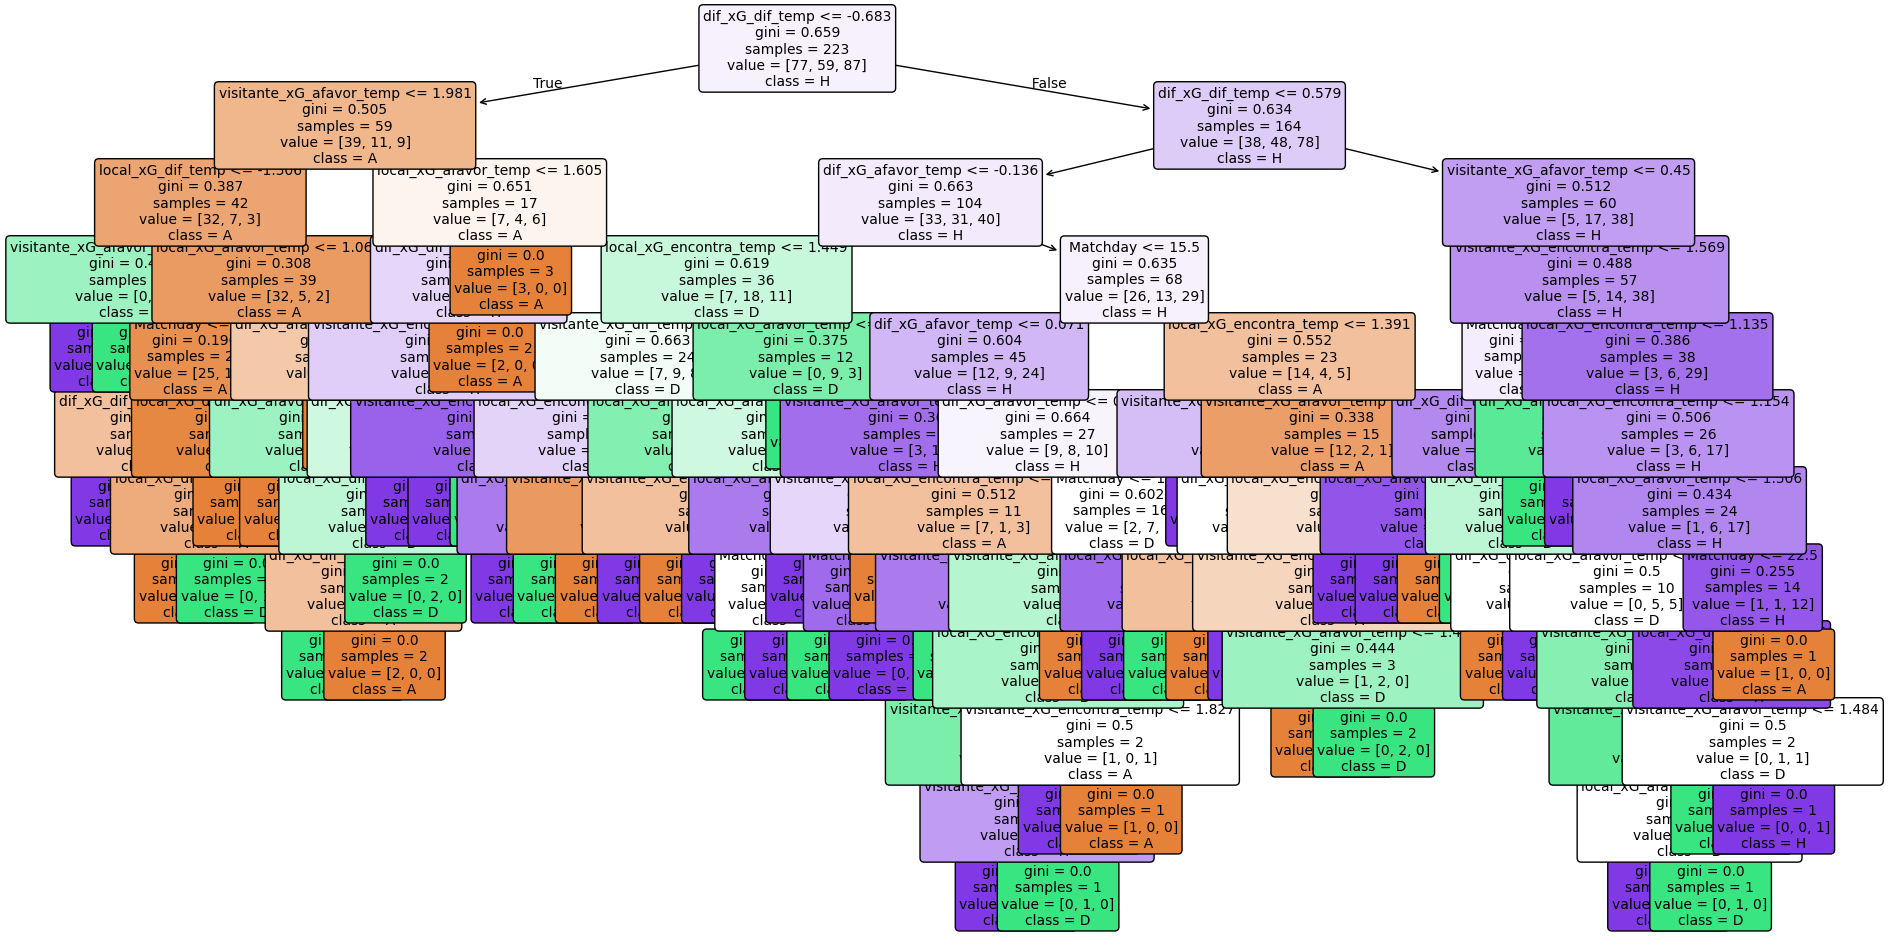

In [22]:
plt.figure(figsize=(22, 12))
plot_tree(
    arbol,
    feature_names=x.columns,
    class_names=sorted(y.unique()),
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

Accuracy: 0.5000

Classification report:
              precision    recall  f1-score   support

           A       0.54      0.68      0.60        22
           D       0.21      0.27      0.24        11
           H       0.71      0.43      0.54        23

    accuracy                           0.50        56
   macro avg       0.49      0.46      0.46        56
weighted avg       0.55      0.50      0.50        56



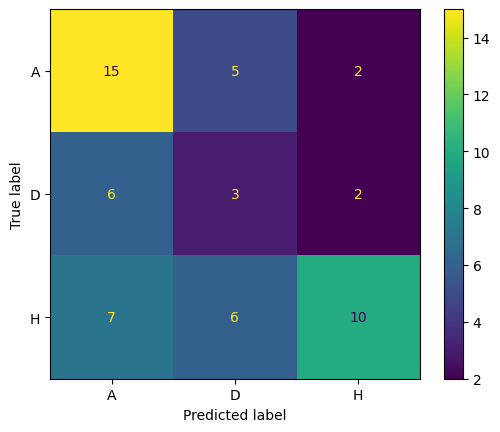

In [23]:
y_pred = arbol.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}\n")

print("Classification report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=sorted(y.unique()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(y.unique()))
disp.plot(values_format="d")
plt.show()


El modelo va bien en caminado, ya que pudo predecir con certeza de mejor manera los partidos en los que gano el equipo local (h) con un 0.71, los partidos en los que gano el equipo visitante (A) es 0.54 el cual podria mejorar notablemente. Desafortunadamente el modelo no logra predecir de mejor manera los partidos clasficados como empate (D) teniendo 0.21 de accuracy.
